In [7]:
# 🧠 Epilepsy Seizure Detection - Notebook 01: Exploration
# Dataset: CSV avec 11,233 échantillons × 36,865 features

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Configuration des graphiques
plt.style.use('default')
sns.set_palette("husl")

In [10]:
print("🧠 Exploration du Dataset EEG pour Détection d'Épilepsie")
print("=" * 60)

🧠 Exploration du Dataset EEG pour Détection d'Épilepsie


In [11]:
# =============================================================================
# 1️⃣ CHARGEMENT ET PREMIÈRE INSPECTION
# =============================================================================


In [12]:
# Chargement du dataset
print("📂 Chargement du dataset...")
df = pd.read_csv('C:\epilepsy-detection-project-main\Data\Raw\EEG_Scaled_data.csv')  # Ajustez le nom si nécessaire

📂 Chargement du dataset...


In [13]:
print(f"✅ Dataset chargé avec succès!")
print(f"📊 Dimensions: {df.shape[0]:,} lignes × {df.shape[1]:,} colonnes")
print(f"💾 Taille en mémoire: {df.memory_usage(deep=True).sum() / 1e6:.1f} MB")


✅ Dataset chargé avec succès!
📊 Dimensions: 11,233 lignes × 36,865 colonnes
💾 Taille en mémoire: 3312.8 MB


In [14]:
# Inspection des premières lignes
print("\n🔍 Aperçu des données:")
print(df.head())


🔍 Aperçu des données:
   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0      0.647      0.149     -0.213     -0.199     -0.287     -0.187   
1     -2.450     -2.788     -2.387     -1.370     -1.032     -1.037   
2     -0.026     -0.123     -0.347     -0.348      0.027      0.162   
3     -0.067     -0.153     -0.180     -0.210     -0.238     -0.183   
4     -0.190     -0.299     -0.333     -0.199      0.182      0.261   

   Channel_7  Channel_8  Channel_9  Channel_10  ...  Channel_36856  \
0      0.320      0.445      0.482       0.348  ...          0.076   
1     -1.253     -1.702     -2.116      -2.019  ...          0.154   
2      0.166     -0.045     -0.083      -0.037  ...          0.086   
3     -0.147     -0.238     -0.305      -0.187  ...         -0.101   
4      0.262     -0.075     -0.403      -0.232  ...          0.621   

   Channel_36857  Channel_36858  Channel_36859  Channel_36860  Channel_36861  \
0          0.283          0.365         -0.013   

In [15]:
# Information sur les colonnes
print(f"\n📋 Types de données:")
print(f"- Colonnes numériques: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"- Colonnes object: {df.select_dtypes(include=['object']).shape[1]}")


📋 Types de données:
- Colonnes numériques: 36865
- Colonnes object: 0


In [16]:
# =============================================================================
# 2️⃣ ANALYSE DE LA VARIABLE CIBLE
# =============================================================================

In [17]:
print("\n" + "="*60)
print("🎯 ANALYSE DE LA VARIABLE CIBLE")
print("="*60)


🎯 ANALYSE DE LA VARIABLE CIBLE


In [18]:
# Identifier la colonne cible (probablement 'y' ou 'target' ou dernière colonne)
possible_targets = ['y', 'target', 'label', 'class', 'seizure']
target_col = None

In [19]:
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

In [20]:
if target_col is None:
    # Prendre la dernière colonne par défaut
    target_col = df.columns[-1]
    print(f"⚠️  Colonne cible supposée: '{target_col}'")
else:
    print(f"✅ Colonne cible identifiée: '{target_col}'")


✅ Colonne cible identifiée: 'target'


In [21]:
# Vérifier les valeurs uniques de la cible
unique_values = df[target_col].unique()
print(f"📊 Valeurs uniques dans {target_col}: {unique_values}")

📊 Valeurs uniques dans target: [0 1]


In [40]:
# Distribution de classes
class_counts = df[target_col].value_counts()
class_props = df[target_col].value_counts(normalize=True)

In [41]:
print(f"\n📊 Distribution des classes:")
print(f"- Non-épileptique (0): {class_counts[0]:,} échantillons ({class_props[0]:.1%})")
print(f"- Épileptique (1): {class_counts[1]:,} échantillons ({class_props[1]:.1%})")
print(f"- Ratio de déséquilibre: 1:{class_counts[0]/class_counts[1]:.1f}")


📊 Distribution des classes:
- Non-épileptique (0): 9,799 échantillons (87.2%)
- Épileptique (1): 1,434 échantillons (12.8%)
- Ratio de déséquilibre: 1:6.8


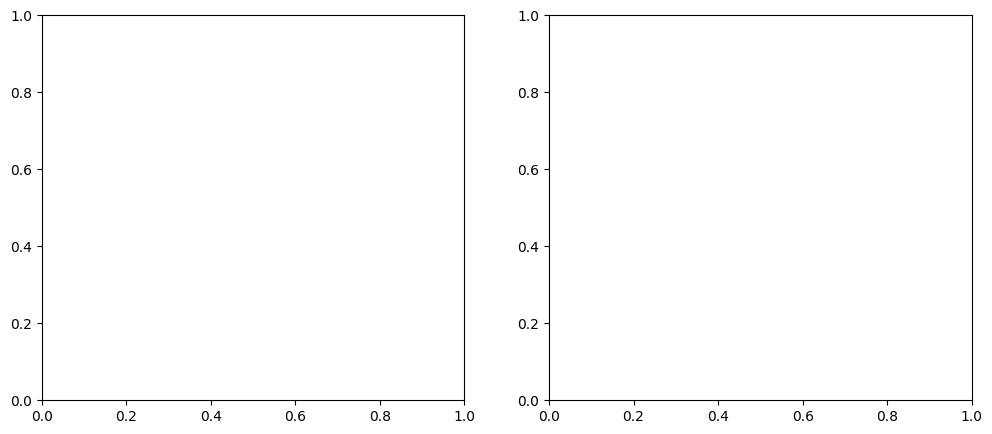

In [42]:
# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [26]:
# Graphique en barres
axes[0].bar(['Non-épileptique', 'Épileptique'], class_counts.values, 
            color=['skyblue', 'lightcoral'])
axes[0].set_title('Distribution des Classes')
axes[0].set_ylabel('Nombre d\'échantillons')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

In [27]:
# Graphique en secteurs
axes[1].pie(class_counts.values, labels=['Non-épileptique', 'Épileptique'], 
            autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
axes[1].set_title('Proportion des Classes')

Text(0.5, 1.0, 'Proportion des Classes')

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [29]:
# =============================================================================
# 3️⃣ ANALYSE DES FEATURES EEG
# =============================================================================

In [30]:
print("\n" + "="*60)
print("🔬 ANALYSE DES FEATURES EEG")
print("="*60)


🔬 ANALYSE DES FEATURES EEG


In [31]:
# Séparer les features de la cible
X = df.drop(columns=[target_col])
y = df[target_col]

In [32]:
print(f"📊 Nombre de features EEG: {X.shape[1]:,}")
print(f"📊 Échantillons: {X.shape[0]:,}")

📊 Nombre de features EEG: 36,865
📊 Échantillons: 11,233


In [33]:
# Statistiques descriptives des features
print(f"\n📈 Statistiques descriptives des features:")
feature_stats = X.describe()
print(feature_stats.iloc[:, :5])  # Montrer seulement les 5 premières


📈 Statistiques descriptives des features:
          Channel_1     Channel_2     Channel_3     Channel_4     Channel_5
count  1.123300e+04  11233.000000  11233.000000  11233.000000  11233.000000
mean  -3.560937e-07     -0.000006      0.000007     -0.000001     -0.000006
std    1.000049e+00      1.000038      1.000041      1.000041      1.000044
min   -1.459100e+01    -14.564000    -15.325000    -14.391000    -13.434000
25%   -1.970000e-01     -0.213000     -0.210000     -0.202000     -0.196000
50%   -4.000000e-03     -0.007000     -0.005000      0.003000      0.012000
75%    1.930000e-01      0.191000      0.188000      0.193000      0.201000
max    1.154900e+01     10.703000      9.743000      9.812000     11.948000


In [34]:
# Valeurs manquantes
missing_count = X.isnull().sum().sum()
print(f"\n🔍 Valeurs manquantes: {missing_count}")


🔍 Valeurs manquantes: 0


In [35]:
if missing_count > 0:
    missing_features = X.isnull().sum()[X.isnull().sum() > 0]
    print(f"Features avec valeurs manquantes: {len(missing_features)}")

In [36]:
# Distribution des valeurs
print(f"\n📊 Plages de valeurs:")
print(f"- Minimum global: {X.min().min():.4f}")
print(f"- Maximum global: {X.max().max():.4f}")
print(f"- Moyenne globale: {X.mean().mean():.4f}")
print(f"- Écart-type global: {X.std().mean():.4f}")


📊 Plages de valeurs:
- Minimum global: -31.5180
- Maximum global: 34.0690
- Moyenne globale: 0.0000
- Écart-type global: 1.0000



📊 Visualisation des premières features...


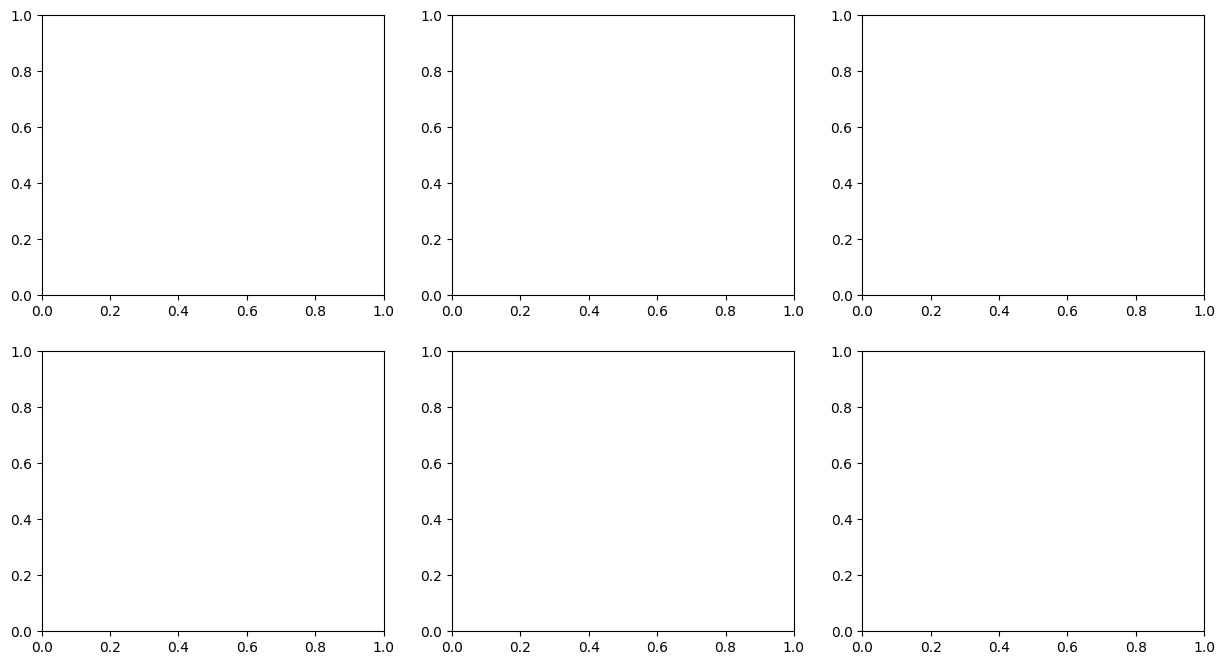

In [37]:
# Visualisation de quelques features
print(f"\n📊 Visualisation des premières features...")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

In [38]:
for i in range(min(6, X.shape[1])):
    feature_name = X.columns[i]


📊 Création des histogrammes...


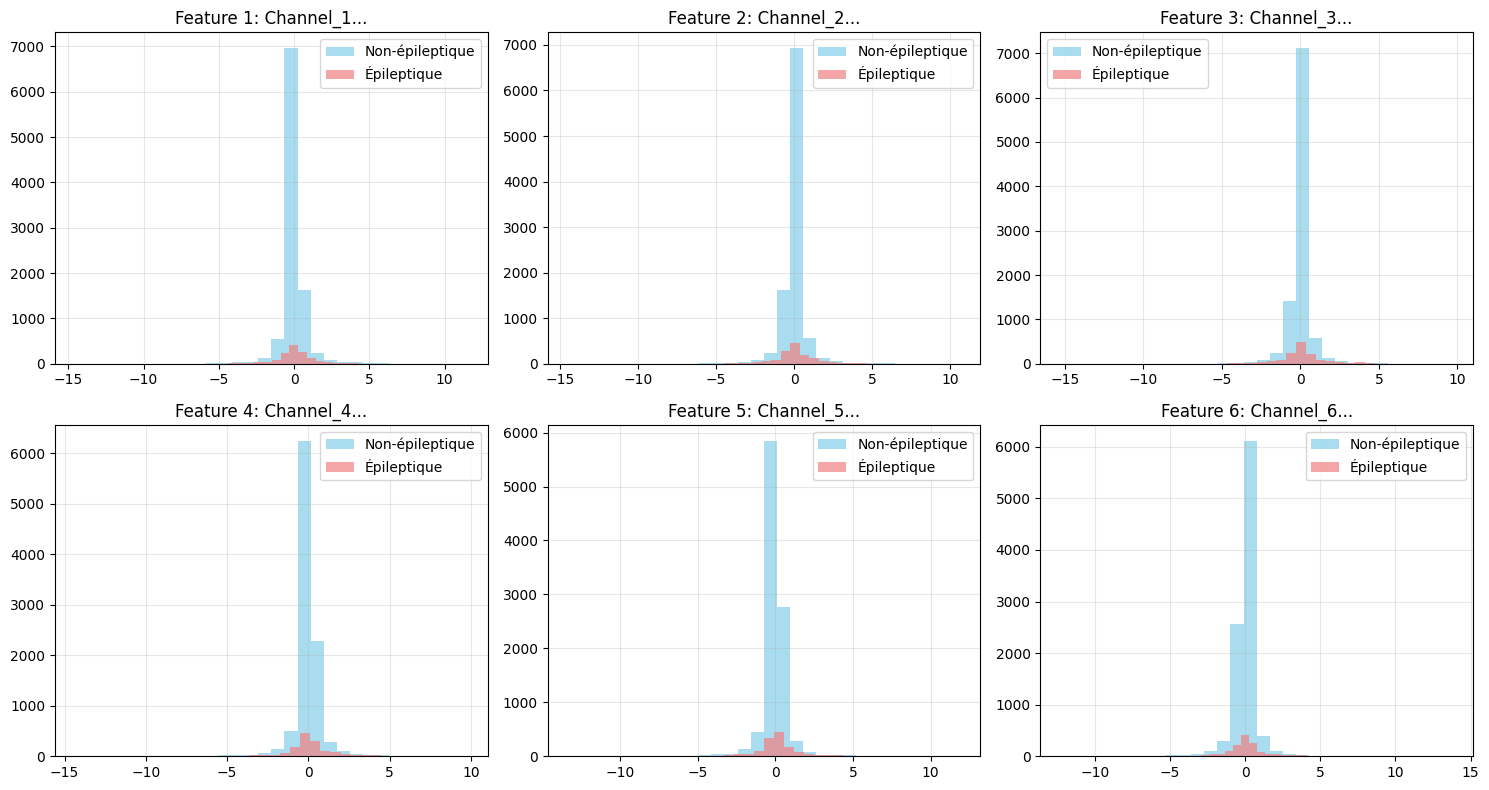

✅ Histogrammes générés avec succès!


In [43]:
print("\n📊 Création des histogrammes...")

# Créer la figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()  # Aplatir pour indexation facile

# BOUCLE CORRECTEMENT INDENTÉE
for i in range(min(6, X.shape[1])):
    feature_name = X.columns[i]
    
    # ✅ INDENTATION CORRECTE (pas d'espaces supplémentaires)
    axes[i].hist(X.loc[y==0, feature_name], alpha=0.7, label='Non-épileptique', 
                 bins=30, color='skyblue')
    axes[i].hist(X.loc[y==1, feature_name], alpha=0.7, label='Épileptique', 
                 bins=30, color='lightcoral')
    axes[i].set_title(f'Feature {i+1}: {feature_name[:20]}...')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Histogrammes générés avec succès!")

In [44]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [45]:
# =============================================================================
# 4️⃣ ANALYSE DE LA CORRÉLATION ET REDONDANCE
# =============================================================================

In [46]:
print("\n" + "="*60)
print("🔗 ANALYSE DE CORRÉLATION")
print("="*60)


🔗 ANALYSE DE CORRÉLATION


In [48]:
# Calculer la corrélation (sur un échantillon pour la performance)
print("⏳ Calcul de la matrice de corrélation (échantillon de 1000 features)...")
sample_features = X.sample(n=min(1000, X.shape[1]), axis=1, random_state=42)
corr_matrix = sample_features.corr()

⏳ Calcul de la matrice de corrélation (échantillon de 1000 features)...


In [49]:
# Statistiques sur les corrélations
corr_values = corr_matrix.values
corr_values = corr_values[np.triu_indices_from(corr_values, k=1)]  # Triangulaire supérieure

In [50]:
print(f"📊 Statistiques des corrélations:")
print(f"- Corrélation moyenne: {np.mean(corr_values):.4f}")
print(f"- Corrélation médiane: {np.median(corr_values):.4f}")
print(f"- Corrélations élevées (>0.9): {np.sum(np.abs(corr_values) > 0.9):,}")
print(f"- Corrélations moyennes (0.5-0.9): {np.sum((np.abs(corr_values) > 0.5) & (np.abs(corr_values) <= 0.9)):,}")

📊 Statistiques des corrélations:
- Corrélation moyenne: 0.0001
- Corrélation médiane: -0.0005
- Corrélations élevées (>0.9): 12
- Corrélations moyennes (0.5-0.9): 193


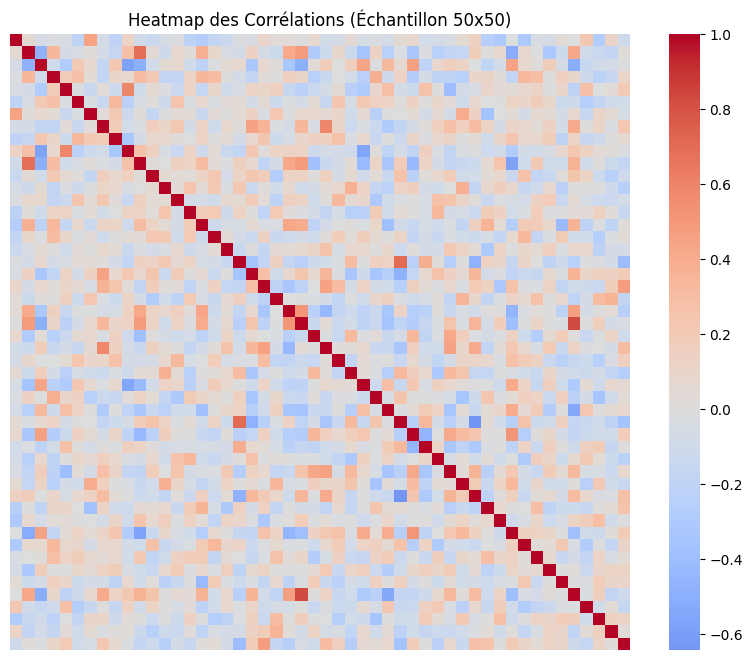

In [51]:
# Heatmap des corrélations (sous-échantillon)
plt.figure(figsize=(10, 8))
sample_small = sample_features.iloc[:50, :50]  # 50x50 pour la visualisation
sns.heatmap(sample_small.corr(), cmap='coolwarm', center=0, 
            xticklabels=False, yticklabels=False)
plt.title('Heatmap des Corrélations (Échantillon 50x50)')
plt.show()

In [52]:
# =============================================================================
# 5️⃣ ANALYSE DIMENSIONNELLE (PCA)
# =============================================================================

In [53]:
print("\n" + "="*60)
print("📐 ANALYSE DIMENSIONNELLE (PCA)")
print("="*60)


📐 ANALYSE DIMENSIONNELLE (PCA)


In [54]:
print("⏳ Calcul de l'ACP...")

⏳ Calcul de l'ACP...


In [55]:
# Standardisation nécessaire pour PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# PCA avec composantes principales
pca = PCA()
pca.fit(X_scaled)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [58]:
# Variance expliquée
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)

In [59]:
# Trouver le nombre de composantes pour 95% et 99% de variance
n_95 = np.argmax(cumsum_variance >= 0.95) + 1
n_99 = np.argmax(cumsum_variance >= 0.99) + 1

In [60]:
print(f"📊 Analyse de la variance expliquée:")
print(f"- Composantes pour 95% variance: {n_95:,} ({n_95/X.shape[1]*100:.1f}% des features)")
print(f"- Composantes pour 99% variance: {n_99:,} ({n_99/X.shape[1]*100:.1f}% des features)")

📊 Analyse de la variance expliquée:
- Composantes pour 95% variance: 1,810 (4.9% des features)
- Composantes pour 99% variance: 3,666 (9.9% des features)


In [61]:
# Graphique de variance expliquée
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

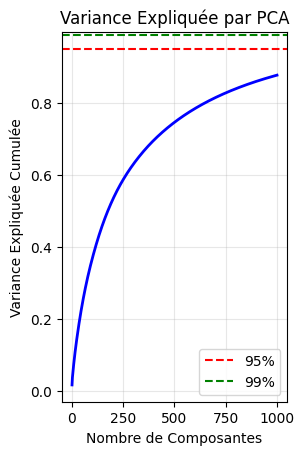

In [62]:
plt.subplot(1, 2, 1)
plt.plot(range(1, min(1000, len(pca.explained_variance_ratio_)) + 1), 
         cumsum_variance[:min(1000, len(cumsum_variance))], 'b-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.axhline(y=0.99, color='g', linestyle='--', label='99%')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Variance Expliquée par PCA')
plt.legend()
plt.grid(True, alpha=0.3)

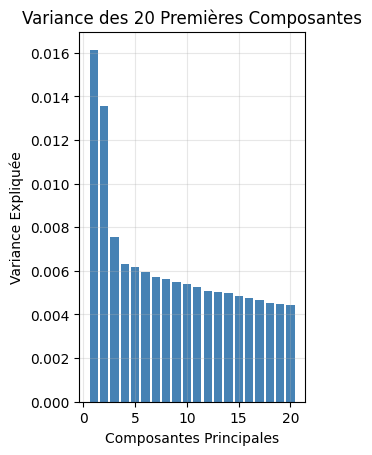

In [63]:
plt.subplot(1, 2, 2)
plt.bar(range(1, 21), pca.explained_variance_ratio_[:20], color='steelblue')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée')
plt.title('Variance des 20 Premières Composantes')
plt.grid(True, alpha=0.3)

In [64]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [65]:
# =============================================================================
# 6️⃣ RÉSUMÉ ET RECOMMANDATIONS
# =============================================================================

In [66]:
print("\n" + "="*60)
print("📋 RÉSUMÉ DE L'EXPLORATION")
print("="*60)


📋 RÉSUMÉ DE L'EXPLORATION


In [67]:
print(f"\n🔬 CARACTÉRISTIQUES:")
print(f"   • Haute dimensionnalité (features >> échantillons)")
print(f"   • {n_95:,} composantes pour 95% de variance")
print(f"   • Données pré-normalisées" if abs(X.mean().mean()) < 1 else "   • Normalisation recommandée")


🔬 CARACTÉRISTIQUES:
   • Haute dimensionnalité (features >> échantillons)
   • 1,810 composantes pour 95% de variance
   • Données pré-normalisées


In [68]:
print(f"\n💡 RECOMMANDATIONS POUR LA MODÉLISATION:")
print(f"   ✅ Priorité INTERPRÉTABILITÉ + PRÉCISION:")
print(f"      • Random Forest avec feature importance")
print(f"      • Logistic Regression avec régularisation L1")
print(f"      • XGBoost avec SHAP pour l'interprétation")
print(f"   ✅ Gestion du déséquilibre:")
print(f"      • Stratified sampling obligatoire")
print(f"      • Métriques: Précision, Rappel, F1, AUC-ROC")
print(f"      • Techniques: SMOTE ou class_weight")
print(f"   ✅ Réduction dimensionnelle:")
print(f"      • PCA à {n_95} composantes (95% variance)")
print(f"      • Sélection de features par importance")


💡 RECOMMANDATIONS POUR LA MODÉLISATION:
   ✅ Priorité INTERPRÉTABILITÉ + PRÉCISION:
      • Random Forest avec feature importance
      • Logistic Regression avec régularisation L1
      • XGBoost avec SHAP pour l'interprétation
   ✅ Gestion du déséquilibre:
      • Stratified sampling obligatoire
      • Métriques: Précision, Rappel, F1, AUC-ROC
      • Techniques: SMOTE ou class_weight
   ✅ Réduction dimensionnelle:
      • PCA à 1810 composantes (95% variance)
      • Sélection de features par importance


In [69]:
print(f"\n🚀 PROCHAINES ÉTAPES:")
print(f"   1. Feature selection (univariée + importance)")
print(f"   2. Validation croisée stratifiée")
print(f"   3. Modèles interprétables (RF, LogReg)")
print(f"   4. Analyse SHAP des prédictions")


🚀 PROCHAINES ÉTAPES:
   1. Feature selection (univariée + importance)
   2. Validation croisée stratifiée
   3. Modèles interprétables (RF, LogReg)
   4. Analyse SHAP des prédictions


In [70]:
print("\n✅ Exploration terminée ! Passez au notebook 02_preprocessing.ipynb")


✅ Exploration terminée ! Passez au notebook 02_preprocessing.ipynb
